# 6. Baseline Model Selection

El propósito del *baseline* es establecer un punto de referencia inicial que sirva para comparar el rendimiento de modelos.

A continuación, compararemos los siguientes modelos:

- **Logistic Regression**
- **Random Forest**
- **Decision Tree**
- **Gradient Boosting**
- **LightGBM**
- **XGBoost**
- **Naive Bayes**
- **SVM (Support Vector Machine)**
- **KNN (K-Nearest Neighbors)**


## 6.1. Logistic Regression Model

**Logistic Regression**: Un modelo lineal que se utiliza para clasificación binaria o multiclase, y es eficaz para problemas donde las relaciones entre variables son lineales.

Necesita escalado porque su rendimiento depende de la magnitud de las características.

Accuracy (test set): 0.71
Matriz de Confusión:
[[ 915   80    3  118  182  302]
 [  29 2631    3   41   62   34]
 [ 113   82   59   53   72   21]
 [ 378   65   18 3261  919  159]
 [ 162   33    1  890 3384  330]
 [  67  417    1   95  112 1708]]
Reporte de Clasificación:
                         precision    recall  f1-score   support

horizontal-misalignment       0.55      0.57      0.56      1600
              imbalance       0.80      0.94      0.86      2800
                 normal       0.69      0.15      0.24       400
               overhang       0.73      0.68      0.70      4800
              underhang       0.72      0.70      0.71      4800
  vertical-misalignment       0.67      0.71      0.69      2400

               accuracy                           0.71     16800
              macro avg       0.69      0.63      0.63     16800
           weighted avg       0.71      0.71      0.71     16800



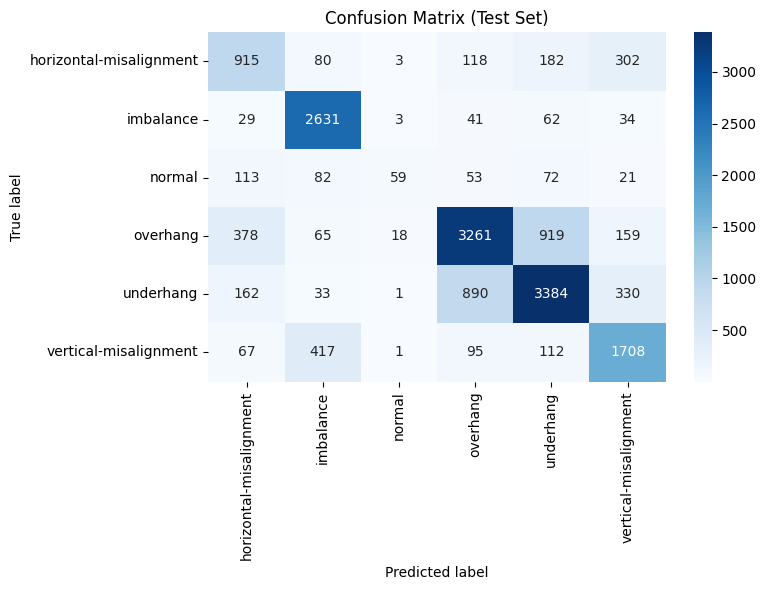

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("df_reduced.csv")

X = df.drop(columns=["Hz", "medida", "Tipo"])
y = df["Tipo"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ESCALADO de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy (test set): {acc:.2f}")
print("Matriz de Confusión:")
print(cm)
print("Reporte de Clasificación:")
print(report)

labels = sorted(model.classes_)  

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm, 
    annot=True,
    fmt='d', 
    cmap='Blues',
    xticklabels=labels,
    yticklabels=labels
)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix (Test Set)")
plt.tight_layout()
plt.show()


## 6.2. Random Forest 

**Random Forest**: Un conjunto de árboles de decisión que utiliza el promedio de las predicciones de varios árboles para mejorar la precisión y reducir el sobreajuste.

Accuracy (test con stratify): 0.99
Matriz de Confusión:
[[1527    2    7    4   11   49]
 [  10 2785    0    2    0    3]
 [   6    0  390    0    1    3]
 [   4    3    0 4786    6    1]
 [   5    1    1    9 4782    2]
 [  13    4    2    0   15 2366]]
Reporte de Clasificación:
                         precision    recall  f1-score   support

horizontal-misalignment       0.98      0.95      0.96      1600
              imbalance       1.00      0.99      1.00      2800
                 normal       0.97      0.97      0.97       400
               overhang       1.00      1.00      1.00      4800
              underhang       0.99      1.00      0.99      4800
  vertical-misalignment       0.98      0.99      0.98      2400

               accuracy                           0.99     16800
              macro avg       0.99      0.98      0.98     16800
           weighted avg       0.99      0.99      0.99     16800



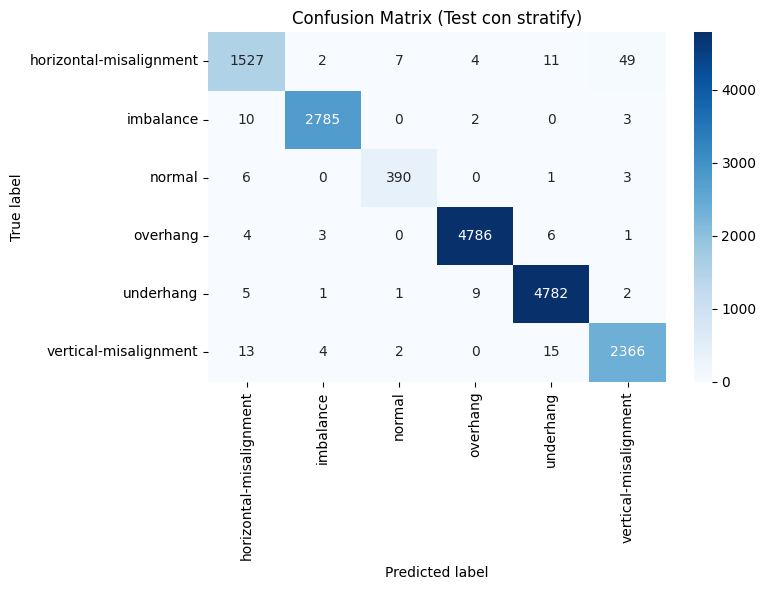

In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("df_reduced.csv")

X = df.drop(columns=["Hz", "medida", "Tipo"])
y = df["Tipo"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy (test con stratify): {acc:.2f}")
print("Matriz de Confusión:")
print(cm)
print("Reporte de Clasificación:")
print(report)

labels = sorted(model.classes_)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm, 
    annot=True,
    fmt='d', 
    cmap='Blues',
    xticklabels=labels,
    yticklabels=labels
)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix (Test con stratify)")
plt.tight_layout()
plt.show()


## 6.3. Decision Tree

**Decision Tree**: Un modelo basado en la creación de un árbol de decisiones que divide el espacio de características en base a reglas de decisión.

Accuracy (test con 'medida' = 6g): 0.95
Matriz de Confusión:
[[1445   12   20   25   29   69]
 [  15 2350    3   12    5   15]
 [  25    3  349    4    7   12]
 [  25   11   11 3497   48    8]
 [  33    4    6   48 3479   30]
 [  99   15   10    9   24 2243]]
Reporte de Clasificación:
                         precision    recall  f1-score   support

horizontal-misalignment       0.88      0.90      0.89      1600
              imbalance       0.98      0.98      0.98      2400
                 normal       0.87      0.87      0.87       400
               overhang       0.97      0.97      0.97      3600
              underhang       0.97      0.97      0.97      3600
  vertical-misalignment       0.94      0.93      0.94      2400

               accuracy                           0.95     14000
              macro avg       0.94      0.94      0.94     14000
           weighted avg       0.95      0.95      0.95     14000



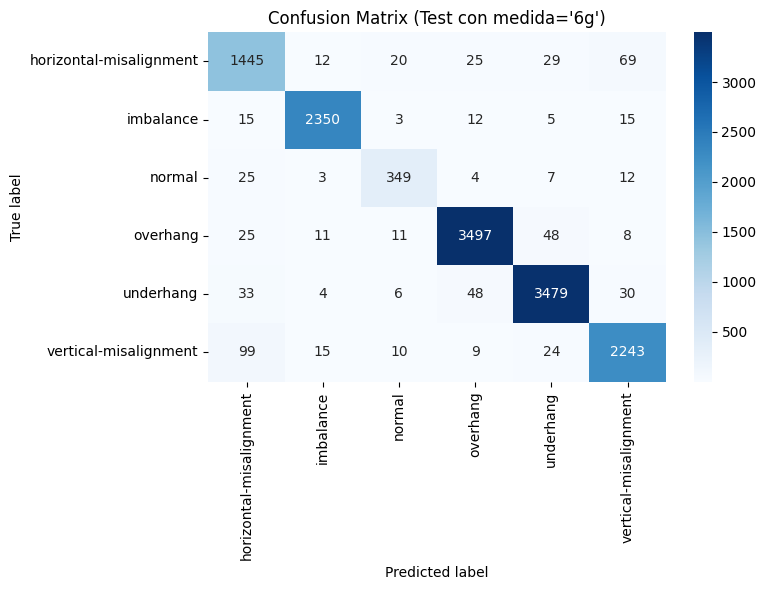

In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("df_reduced.csv")

df_train = df[(df["medida"] != "6g")]  
df_test  = df[(df["medida"] == "6g")]  

X_train = df_train.drop(columns=["Hz", "medida", "Tipo"])
y_train = df_train["Tipo"]

X_test = df_test.drop(columns=["Hz", "medida", "Tipo"])
y_test = df_test["Tipo"]

X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy (test con 'medida' = 6g): {acc:.2f}")
print("Matriz de Confusión:")
print(cm)
print("Reporte de Clasificación:")
print(report)

labels = sorted(model.classes_)  

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm, 
    annot=True,
    fmt='d', 
    cmap='Blues',
    xticklabels=labels,
    yticklabels=labels
)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix (Test con medida='6g')")
plt.tight_layout()
plt.show()


## 6.4. Gradient Boosting

**Gradient Boosting**: Un modelo que construye árboles de decisión de manera secuencial, corrigiendo los errores de los árboles anteriores, lo que mejora la precisión.

Accuracy (test con 'medida' = 6g): 0.96
Matriz de Confusión:
[[1393    5   19   33   25  125]
 [  18 2356    1   11    5    9]
 [  20    1  365    2    4    8]
 [  21    7    6 3519   42    5]
 [  28    2    3   31 3532    4]
 [  46    4    5    3   22 2320]]
Reporte de Clasificación:
                         precision    recall  f1-score   support

horizontal-misalignment       0.91      0.87      0.89      1600
              imbalance       0.99      0.98      0.99      2400
                 normal       0.91      0.91      0.91       400
               overhang       0.98      0.98      0.98      3600
              underhang       0.97      0.98      0.98      3600
  vertical-misalignment       0.94      0.97      0.95      2400

               accuracy                           0.96     14000
              macro avg       0.95      0.95      0.95     14000
           weighted avg       0.96      0.96      0.96     14000



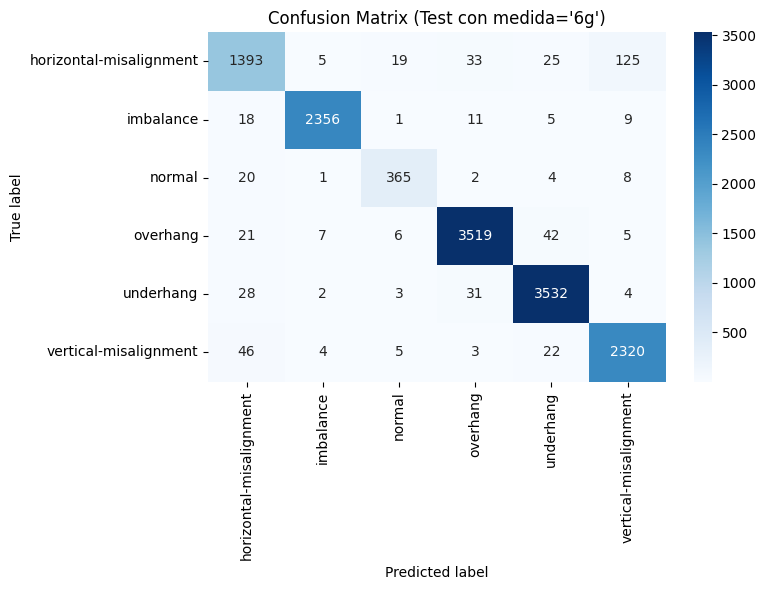

In [4]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("df_reduced.csv")

df_train = df[(df["medida"] != "6g")]  
df_test  = df[(df["medida"] == "6g")] 

X_train = df_train.drop(columns=["Hz", "medida", "Tipo"])
y_train = df_train["Tipo"]

X_test = df_test.drop(columns=["Hz", "medida", "Tipo"])
y_test = df_test["Tipo"]

X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

model = GradientBoostingClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy (test con 'medida' = 6g): {acc:.2f}")
print("Matriz de Confusión:")
print(cm)
print("Reporte de Clasificación:")
print(report)

labels = sorted(model.classes_) 

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm, 
    annot=True,
    fmt='d', 
    cmap='Blues',
    xticklabels=labels,
    yticklabels=labels
)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix (Test con medida='6g')")
plt.tight_layout()
plt.show()


## 6.5. LightGBM 

**LightGBM**: Una implementación de Gradient Boosting optimizada para ser más rápida y eficiente en el uso de memoria, adecuada para conjuntos de datos grandes.

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011721 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8160
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 32
[LightGBM] [Info] Start training from score -2.169054
[LightGBM] [Info] Start training from score -1.763589
[LightGBM] [Info] Start training from score -3.555348
[LightGBM] [Info] Start training from score -1.358123
[LightGBM] [Info] Start training from score -1.358123
[LightGBM] [Info] Start training from score -1.763589
Accuracy (test con 'medida' = 6g): 0.99
Matriz de Confusión:
[[1558    4    9    7    0   22]
 [   5 2394    1    0    0    0]
 [   8    0  391    0    0    1]
 [   5    0    2 3593    0    0]
 [   3    0    1    7 3587    2]
 [  14    1    1    0    5 2379]]
Reporte de Clasificación:
                         precision    recall  f1-score   support

horizontal-misalignment       0.98 

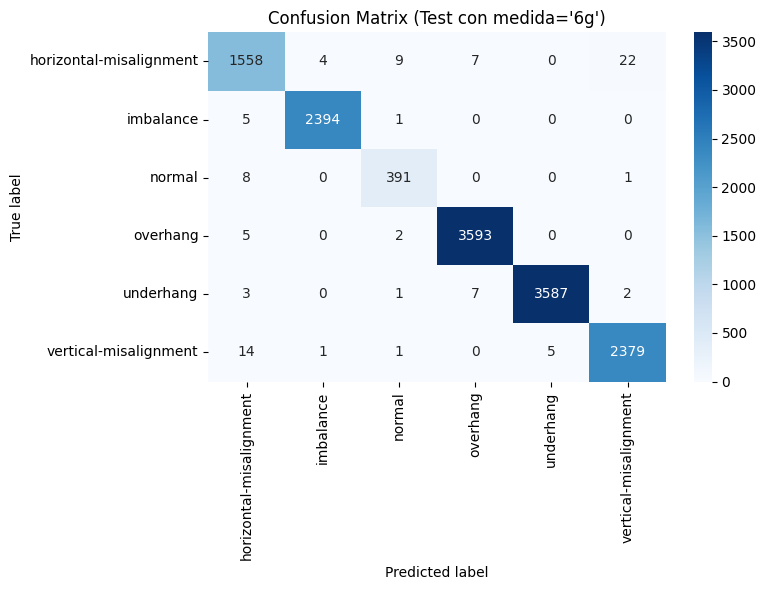

In [5]:
import pandas as pd
import lightgbm as lgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("df_reduced.csv")

df_train = df[(df["medida"] != "6g")]  
df_test  = df[(df["medida"] == "6g")]  

X_train = df_train.drop(columns=["Hz", "medida", "Tipo"])
y_train = df_train["Tipo"]

X_test = df_test.drop(columns=["Hz", "medida", "Tipo"])
y_test = df_test["Tipo"]

X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

model = lgb.LGBMClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy (test con 'medida' = 6g): {acc:.2f}")
print("Matriz de Confusión:")
print(cm)
print("Reporte de Clasificación:")
print(report)

labels = sorted(model.classes_)  

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm, 
    annot=True,
    fmt='d', 
    cmap='Blues',
    xticklabels=labels,
    yticklabels=labels
)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix (Test con medida='6g')")
plt.tight_layout()
plt.show()


## 6.6. XGBoost

**XGBoost**: Otro modelo basado en Gradient Boosting, conocido por su capacidad para manejar grandes volúmenes de datos y evitar el sobreajuste mediante regularización.

c:\Users\aanaj\miniconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:40:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy (test con 'medida' = 6g): 0.99
Matriz de Confusión:
[[1563    4    8    4    2   19]
 [   5 2394    0    1    0    0]
 [   7    0  392    0    0    1]
 [   6    1    1 3591    0    1]
 [   3    1    2    5 3587    2]
 [  11    2    2    0    4 2381]]
Reporte de Clasificación:
                         precision    recall  f1-score   support

horizontal-misalignment       0.98      0.98      0.98      1600
              imbalance       1.00      1.00      1.00      2400
                 normal       0.97      0.98      0.97       400
               overhang       1.00      1.00      1.00      3600
              underhang       1.00      1.00      1.00      3600
  vertical-misalignment       0.99      0.99      0.99      2400

               accuracy                           0.99     14000
              macro avg       0.99      0.99      0.99     14000
           weighted avg       0.99      0.99      0.99     14000



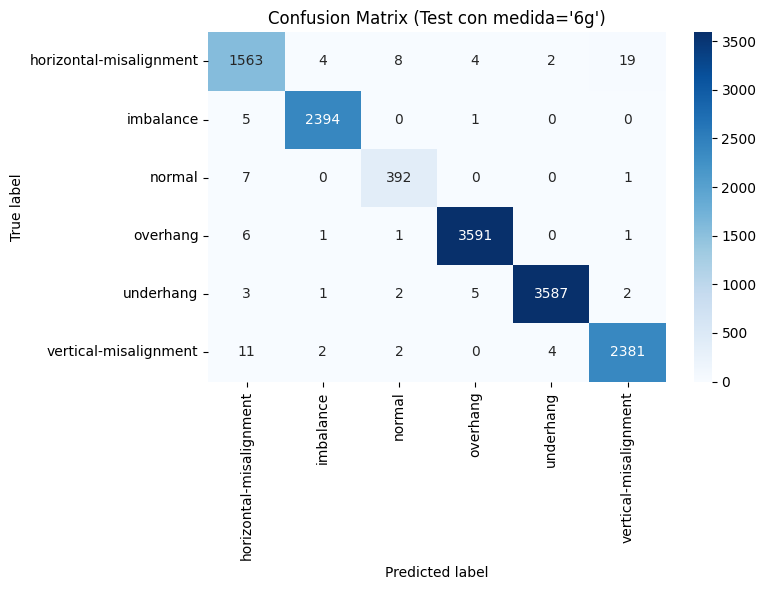

In [1]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("df_reduced.csv")

df_train = df[(df["medida"] != "6g")]  
df_test  = df[(df["medida"] == "6g")]  

X_train = df_train.drop(columns=["Hz", "medida", "Tipo"])
y_train = df_train["Tipo"]

X_test = df_test.drop(columns=["Hz", "medida", "Tipo"])
y_test = df_test["Tipo"]

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

model = xgb.XGBClassifier(
    n_estimators=100, 
    random_state=42, 
    use_label_encoder=False,  
    eval_metric='mlogloss'   
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print(f"Accuracy (test con 'medida' = 6g): {acc:.2f}")
print("Matriz de Confusión:")
print(cm)
print("Reporte de Clasificación:")
print(report)

labels = label_encoder.classes_

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm, 
    annot=True,
    fmt='d', 
    cmap='Blues',
    xticklabels=labels,
    yticklabels=labels
)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix (Test con medida='6g')")
plt.tight_layout()
plt.show()


## 6.7. Naive Bayes

**Naive Bayes**: Un modelo probabilístico que se basa en el teorema de Bayes y la independencia entre las características, ideal para problemas con grandes conjuntos de datos categóricos.

In [7]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

df = pd.read_csv("df_reduced.csv")

X = df.drop(columns=["Hz", "medida", "Tipo"])
y = df["Tipo"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

model = GaussianNB()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print(f"Accuracy (test con 'medida' = 6g): {acc:.2f}")
print("Matriz de Confusión:")
print(cm)
print("Reporte de Clasificación:")
print(report)


Accuracy (test con 'medida' = 6g): 0.38
Matriz de Confusión:
[[ 240   11 1099    2    6  242]
 [  73 1180 1350    5    7  185]
 [  10    1  381    1    0    7]
 [  98  145 1745 2158  218  436]
 [ 234  117 1891  134 2077  347]
 [ 133   21 1807    3    8  428]]
Reporte de Clasificación:
                         precision    recall  f1-score   support

horizontal-misalignment       0.30      0.15      0.20      1600
              imbalance       0.80      0.42      0.55      2800
                 normal       0.05      0.95      0.09       400
               overhang       0.94      0.45      0.61      4800
              underhang       0.90      0.43      0.58      4800
  vertical-misalignment       0.26      0.18      0.21      2400

               accuracy                           0.38     16800
              macro avg       0.54      0.43      0.37     16800
           weighted avg       0.72      0.38      0.48     16800



## 6.8. SVM 

**SVM (Support Vector Machine)**: Un modelo que busca encontrar el margen óptimo que separa las clases en el espacio de características, eficaz para clasificación con límites complejos.

Requiere que las características estén en una escala similar para calcular correctamente los márgenes.

Accuracy (test con 'medida' = 6g): 0.85
Matriz de Confusión:
[[1207    8    0   27   67  291]
 [  66 2006    0    2   13  313]
 [ 271    0    1   12   76   40]
 [ 179    7    0 3296  111    7]
 [ 204    5    0  123 3253   15]
 [ 116   52    0   19   86 2127]]
Reporte de Clasificación:
                         precision    recall  f1-score   support

horizontal-misalignment       0.59      0.75      0.66      1600
              imbalance       0.97      0.84      0.90      2400
                 normal       1.00      0.00      0.00       400
               overhang       0.95      0.92      0.93      3600
              underhang       0.90      0.90      0.90      3600
  vertical-misalignment       0.76      0.89      0.82      2400

               accuracy                           0.85     14000
              macro avg       0.86      0.72      0.70     14000
           weighted avg       0.87      0.85      0.84     14000



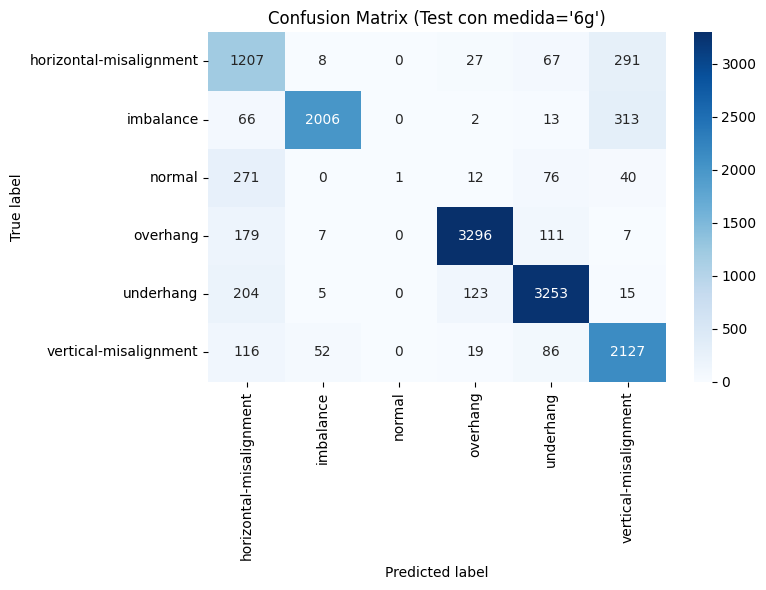

In [8]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("df_reduced.csv")

df_train = df[(df["medida"] != "6g")]  
df_test  = df[(df["medida"] == "6g")]  

X_train = df_train.drop(columns=["Hz", "medida", "Tipo"])
y_train = df_train["Tipo"]

X_test = df_test.drop(columns=["Hz", "medida", "Tipo"])
y_test = df_test["Tipo"]

X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.transform(X_test)        

model = SVC(random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy (test con 'medida' = 6g): {acc:.2f}")
print("Matriz de Confusión:")
print(cm)
print("Reporte de Clasificación:")
print(report)

labels = sorted(model.classes_)  

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm, 
    annot=True,
    fmt='d', 
    cmap='Blues',
    xticklabels=labels,
    yticklabels=labels
)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix (Test con medida='6g')")
plt.tight_layout()
plt.show()


## 6.9. K-Nearest Neighbors (KNN)

**KNN (K-Nearest Neighbors)**: Un modelo basado en la proximidad de los puntos de datos, donde la clase de un punto se determina por los k vecinos más cercanos.

Calcula distancias entre puntos, por lo que las escalas inconsistentes distorsionan los resultados.

Accuracy (test con estratificación): 0.86
Matriz de Confusión:
[[1153   22   52  145   67  161]
 [  45 2519    1    7   32  196]
 [ 102    1  171   45   32   49]
 [ 233   11   33 4340  168   15]
 [ 134   33   44  237 4342   10]
 [ 179  115   40   31   51 1984]]
Reporte de Clasificación:
                         precision    recall  f1-score   support

horizontal-misalignment       0.62      0.72      0.67      1600
              imbalance       0.93      0.90      0.92      2800
                 normal       0.50      0.43      0.46       400
               overhang       0.90      0.90      0.90      4800
              underhang       0.93      0.90      0.91      4800
  vertical-misalignment       0.82      0.83      0.82      2400

               accuracy                           0.86     16800
              macro avg       0.78      0.78      0.78     16800
           weighted avg       0.87      0.86      0.86     16800



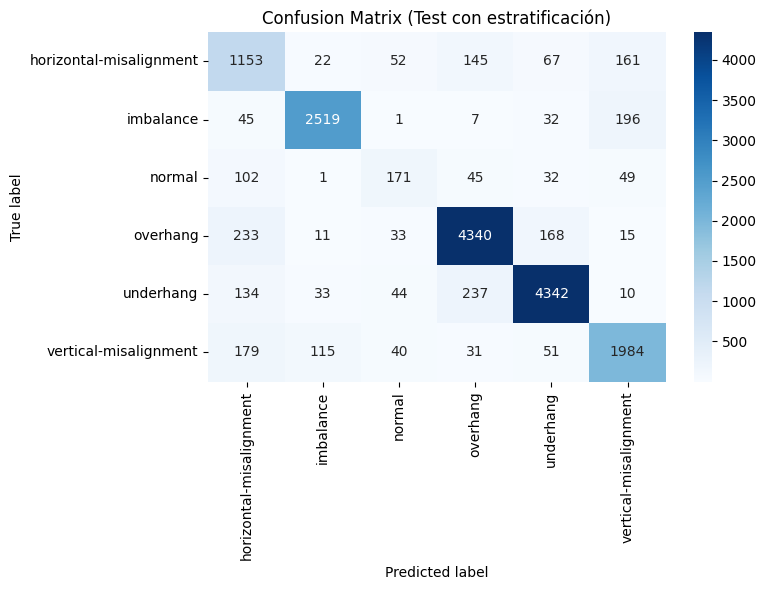

In [9]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split  
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("df_reduced.csv")

X = df.drop(columns=["Hz", "medida", "Tipo"])
y = df["Tipo"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.transform(X_test)        

model = KNeighborsClassifier(n_neighbors=5)  
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy (test con estratificación): {acc:.2f}")
print("Matriz de Confusión:")
print(cm)
print("Reporte de Clasificación:")
print(report)

labels = sorted(model.classes_)  

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm, 
    annot=True,
    fmt='d', 
    cmap='Blues',
    xticklabels=labels,
    yticklabels=labels
)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix (Test con estratificación)")
plt.tight_layout()
plt.show()
